<a href="https://colab.research.google.com/github/WolfyIt/Modelos/blob/main/Copy_of_Actividad1%3F%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # import necessary libraries

import pandas as pd
import sys
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Montar google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# load dataset
csv_path = "/content/gdrive/MyDrive/DataSets/Ejercicios/Practica 1/CarEmision.csv"
df_train = pd.read_csv(csv_path, sep = ',')

<ipython-input-3-06c6fdc8818d>:3: DtypeWarning: Columns (6,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(csv_path, sep = ',')


In [ ]:
df_train

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,6,D,D6,NaN,1968.0,...,74.0,108.0,0.0,1316.0,NaN,NaN,NaN,NaN,NaN,NaN
45507,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,6,E,M6,NaN,1984.0,...,38.0,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45508,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,6,E,M6,NaN,1984.0,...,38.0,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45509,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,6,F,D6,NaN,1984.0,...,54.0,32.0,NaN,1707.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check shape
print(df_train.shape)


(45511, 31)


In [ ]:
# look a first 10 rows of training data
df_train.head(10)

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
5,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,Ti,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
6,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
7,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
8,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,2.0 Selespeed,2,NaN,SAT5,Automatic,1970.0,...,NaN,NaN,NaN,NaN,641.0,NaN,NaN,NaN,NaN,NaN
9,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,2.0 Twin Spark 16v,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,641.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# see all the column names
df_train.columns

Index(['file', 'year', 'manufacturer', 'model', 'description', 'euro_standard',
       'tax_band', 'transmission', 'transmission_type', 'engine_capacity',
       'fuel_type', 'urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial',
       'noise_level', 'co2', 'thc_emissions', 'co_emissions', 'nox_emissions',
       'thc_nox_emissions', 'particulates_emissions', 'fuel_cost_12000_miles',
       'fuel_cost_6000_miles', 'standard_12_months', 'standard_6_months',
       'first_year_12_months', 'first_year_6_months', 'date_of_change'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial          45498 non-null

In [ ]:
df_train['engine_capacity'].describe()

,engine_capacity
count,45504.000000
mean,2182.770526
std,899.100669
min,209.000000
25%,1598.000000
50%,1988.000000
75%,2429.000000
max,8285.000000


Text(171.58159722222234, 0.5, 'Features')

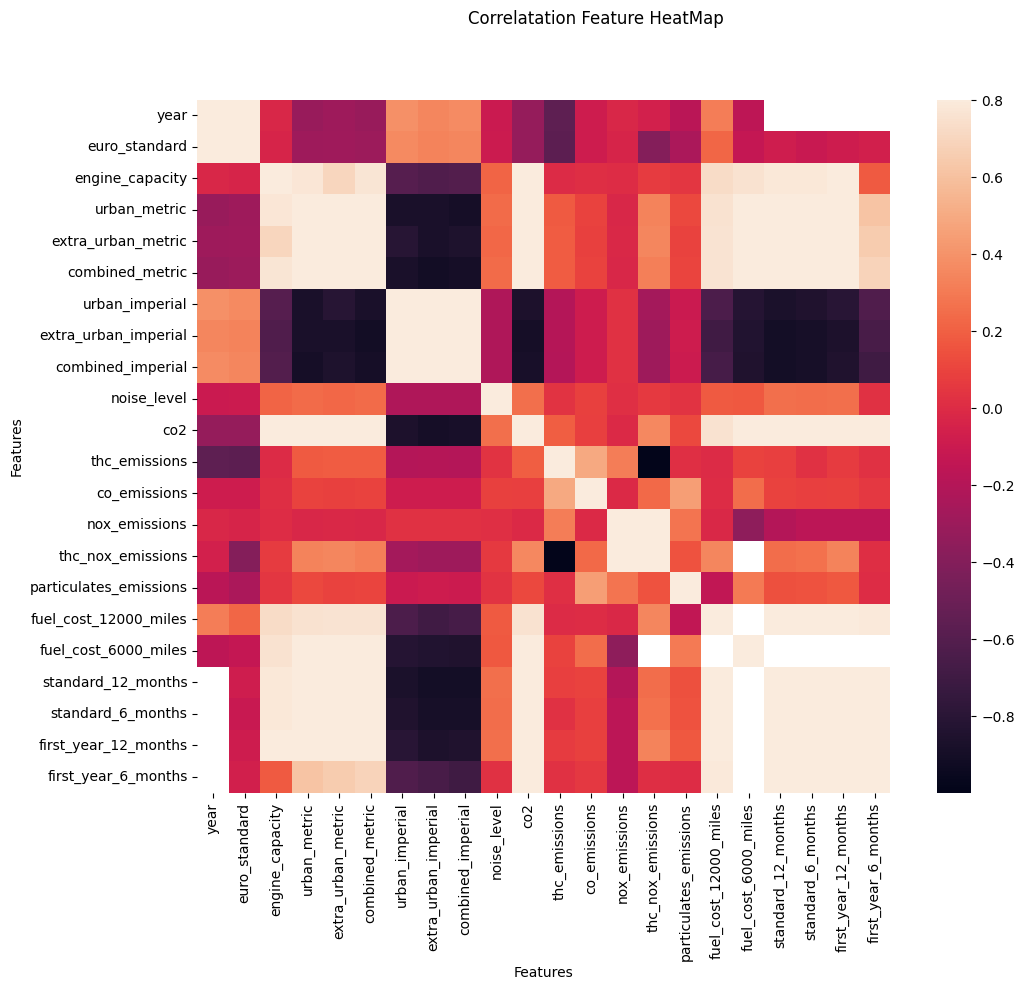

In [ ]:
#correlation matrix
#corr_mat = df_train.corr()
#f, ax = plt.subplots(figsize=(12, 9))

df_train_numeric = df_train.select_dtypes(include=[float, int])
corr_mat = df_train_numeric.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

In [ ]:
df_train_numeric.columns

Index(['year', 'euro_standard', 'engine_capacity', 'urban_metric',
       'extra_urban_metric', 'combined_metric', 'urban_imperial',
       'extra_urban_imperial', 'combined_imperial', 'noise_level', 'co2',
       'thc_emissions', 'co_emissions', 'nox_emissions', 'thc_nox_emissions',
       'particulates_emissions', 'fuel_cost_12000_miles',
       'fuel_cost_6000_miles', 'standard_12_months', 'standard_6_months',
       'first_year_12_months', 'first_year_6_months'],
      dtype='object')

Text(98.74999999999999, 0.5, 'Features')

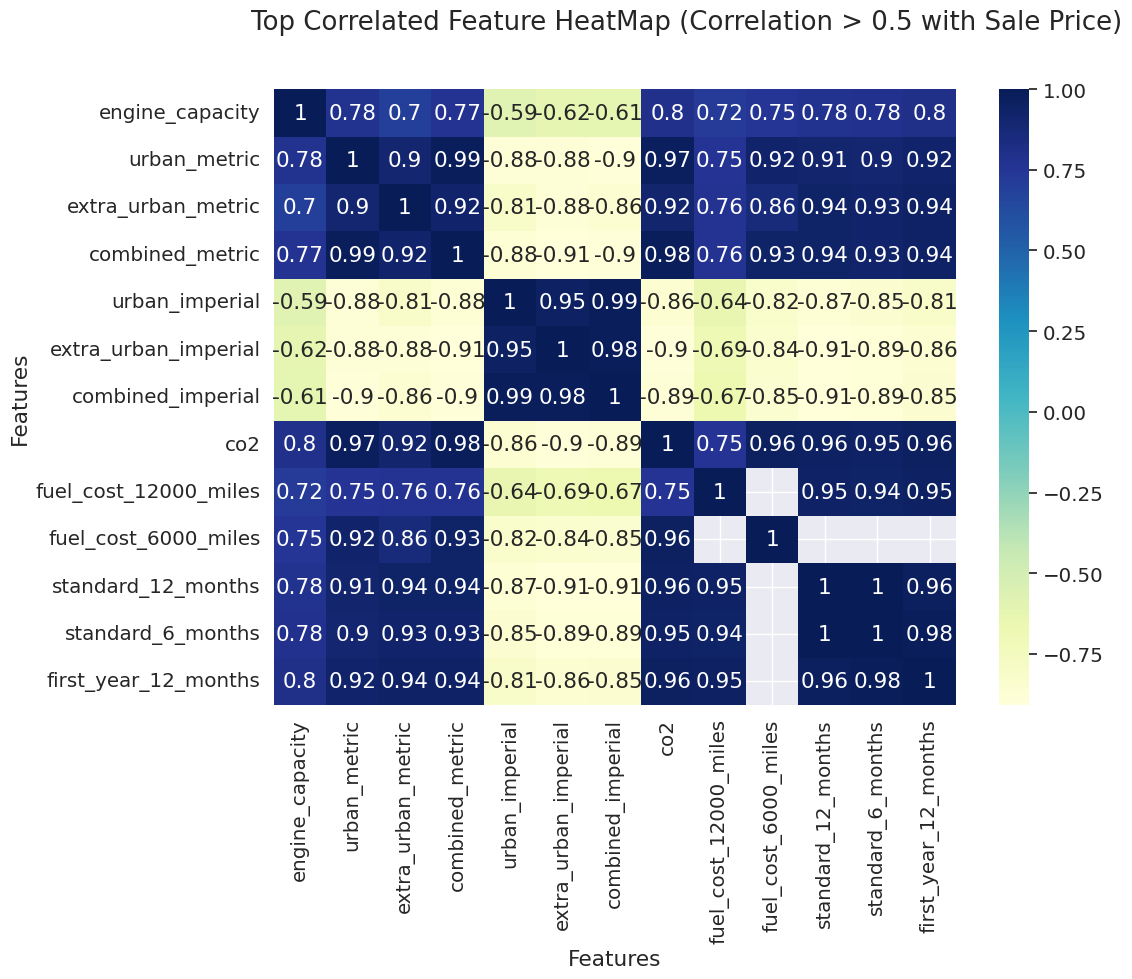

In [ ]:
df_train_numeric = df_train.select_dtypes(include=[float, int])
corr_mat = df_train_numeric.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["engine_capacity"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [ ]:
print("Correlation Values")


df_train_numeric = df_train.select_dtypes(include=[float, int])
corr = df_train_numeric.corr().drop('engine_capacity')
corr.sort_values(["engine_capacity"], ascending = False, inplace = True)
print(corr.engine_capacity)

Correlation Values
first_year_12_months      0.801638
co2                       0.798010
standard_6_months         0.784849
standard_12_months        0.781318
urban_metric              0.776723
combined_metric           0.766905
fuel_cost_6000_miles      0.751939
fuel_cost_12000_miles     0.723324
extra_urban_metric        0.698636
noise_level               0.216202
first_year_6_months       0.179937
thc_nox_emissions         0.062416
particulates_emissions    0.042150
co_emissions              0.012249
nox_emissions             0.000479
thc_emissions            -0.005250
year                     -0.025921
euro_standard            -0.041140
urban_imperial           -0.593433
combined_imperial        -0.612094
extra_urban_imperial     -0.623380
Name: engine_capacity, dtype: float64


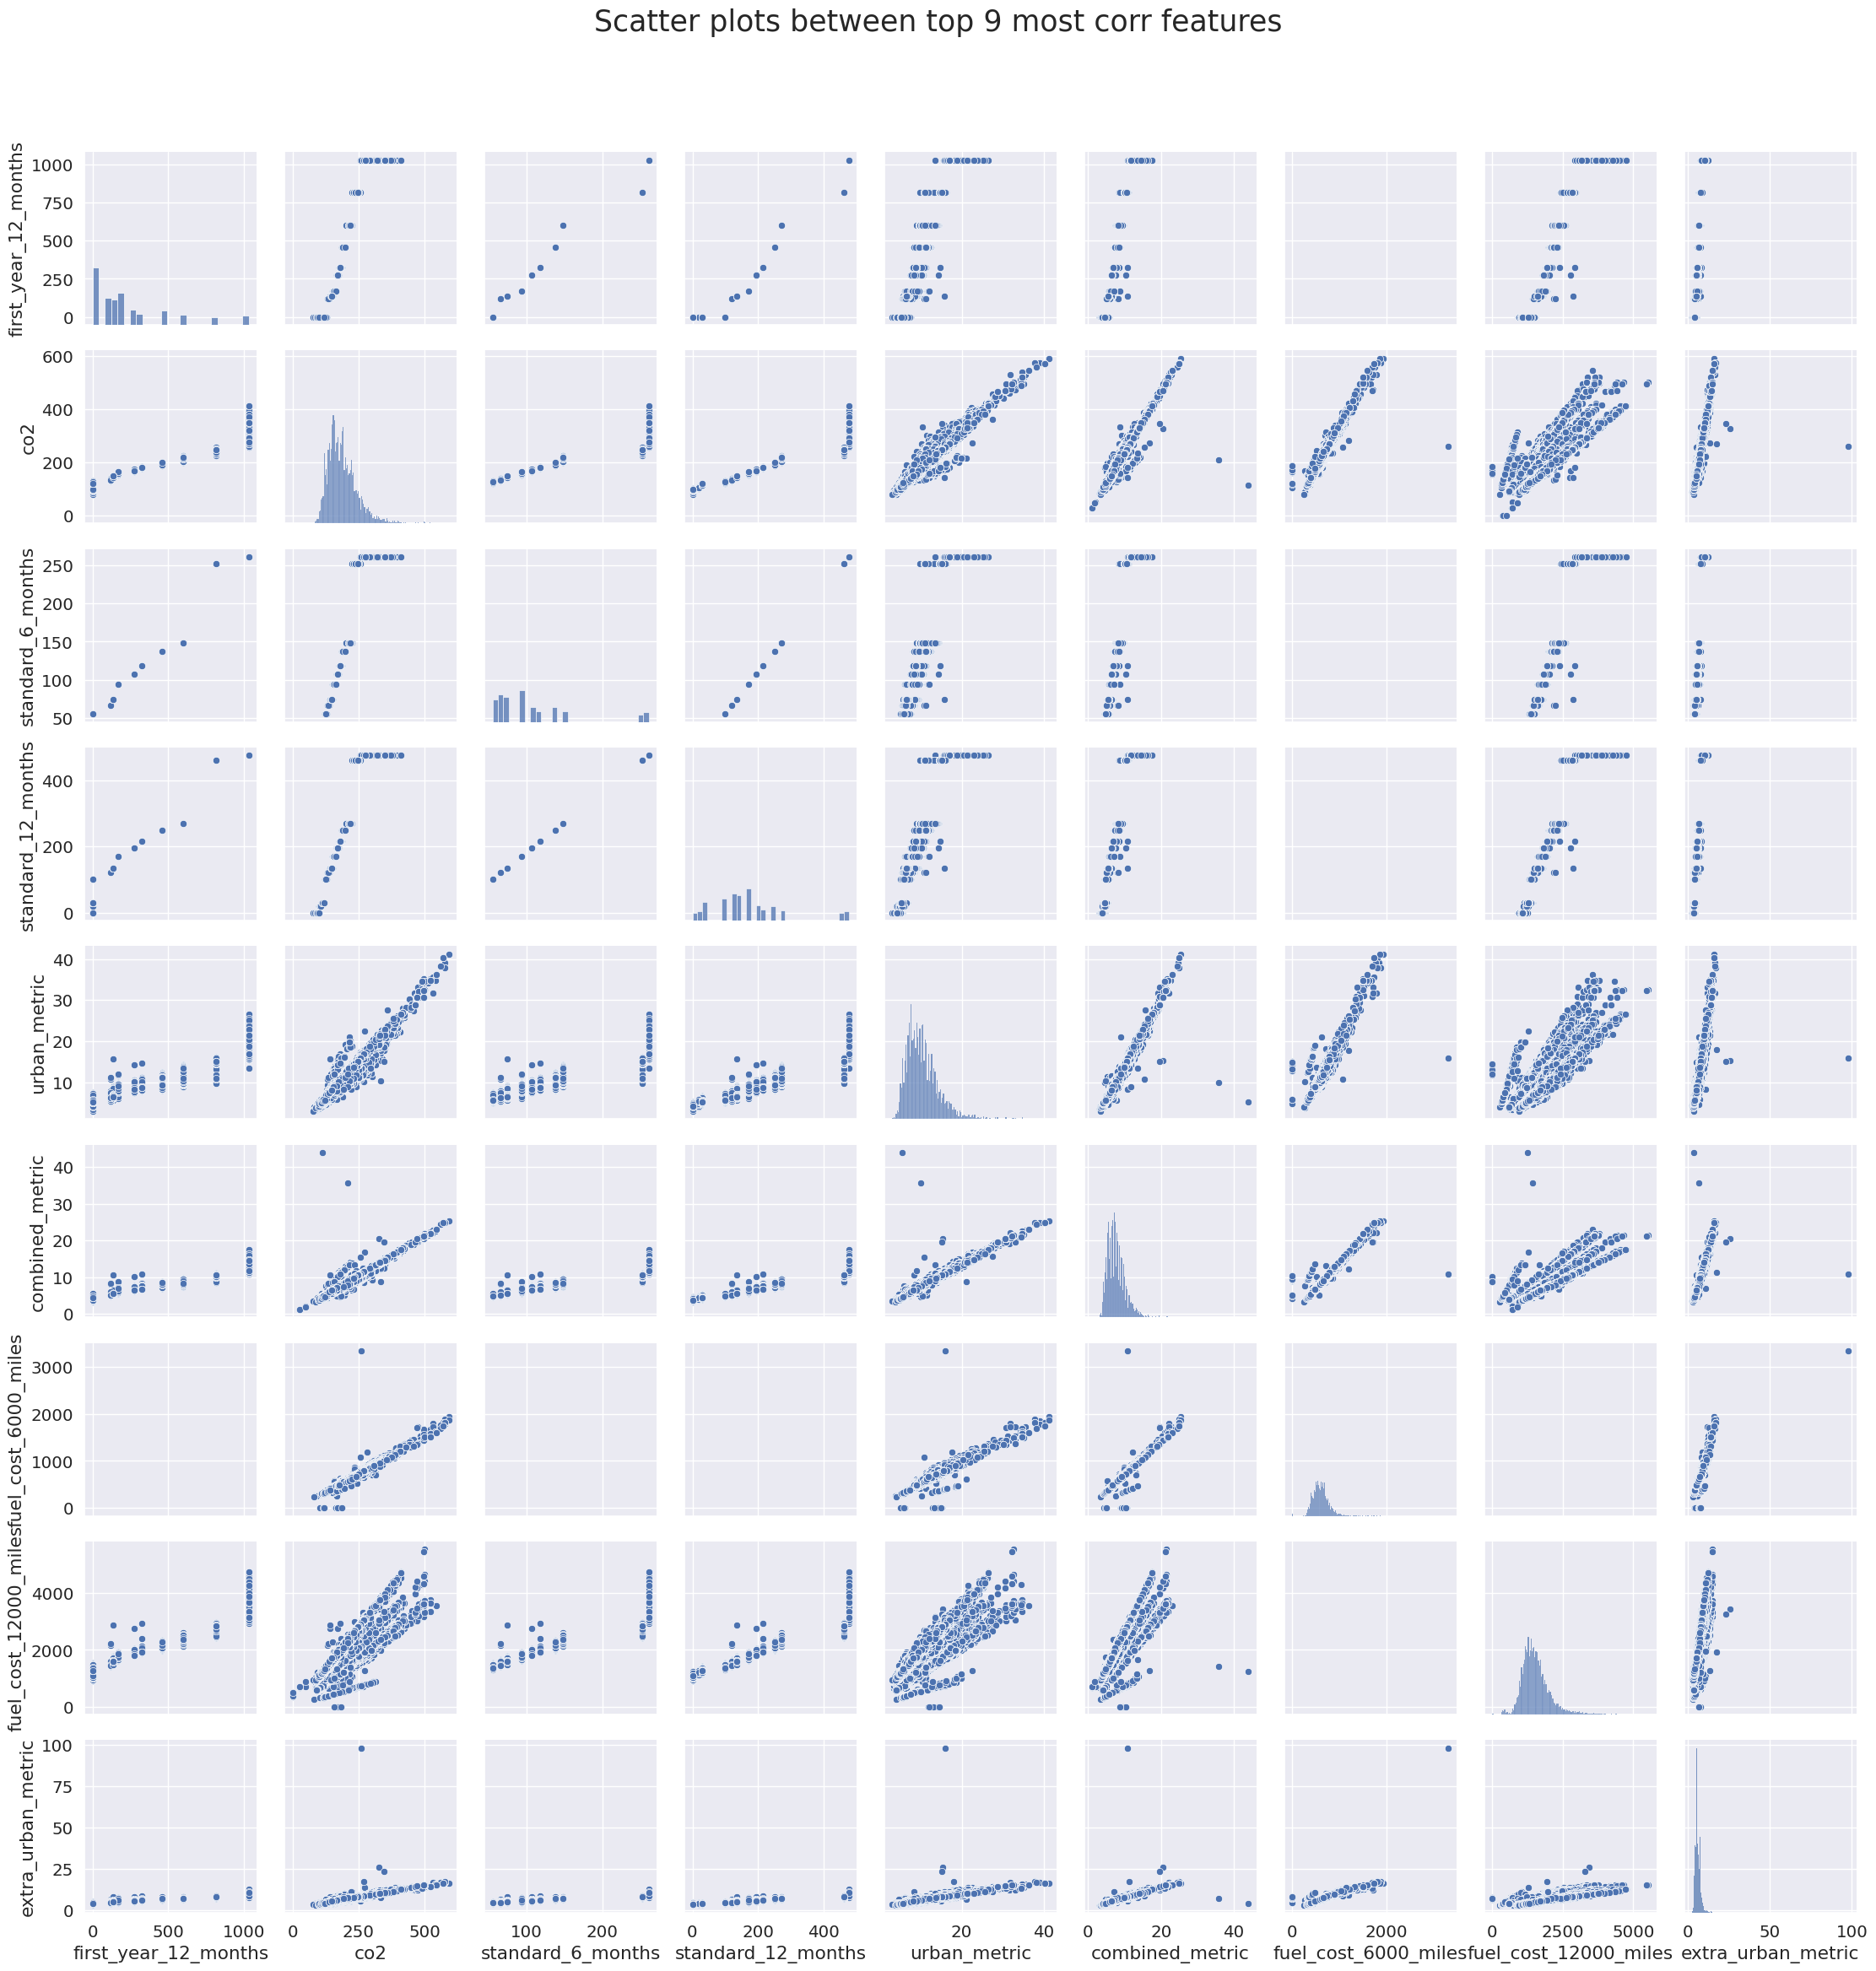

In [ ]:
rcParams['figure.figsize'] = 5,5
cols = ['first_year_12_months', 'co2', 'standard_6_months', 'standard_12_months','urban_metric', 'combined_metric','fuel_cost_6000_miles','fuel_cost_12000_miles','extra_urban_metric']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 5,5
cols = ['extra_urban_imperial', 'combined_imperial', 'urban_imperial', 'euro_standard','year', 'thc_emissions','nox_emissions','co_emissions','particulates_emissions']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
#drop id as it is not required for training or prediction
train_ID = df_train['first_year_12_months']

df_train.drop(['first_year_12_months'], axis=1, inplace=True) #axis=1 ->elimina columna inplace=True -> reemplaza el resultado sobre el mismo dataset de pandas

df_train.shape

(45511, 30)

In [ ]:
df_train.drop(['noise_level',
               'first_year_6_months',
               'thc_nox_emissions',
               'particulates_emissions',
               'co_emissions',
               'nox_emissions',
               'thc_emissions',
               'year',
               'euro_standard',
               'urban_imperial',
               'combined_imperial',
               'extra_urban_imperial'],
              axis=1, inplace=True)


<Axes: xlabel='engine_capacity', ylabel='co2'>

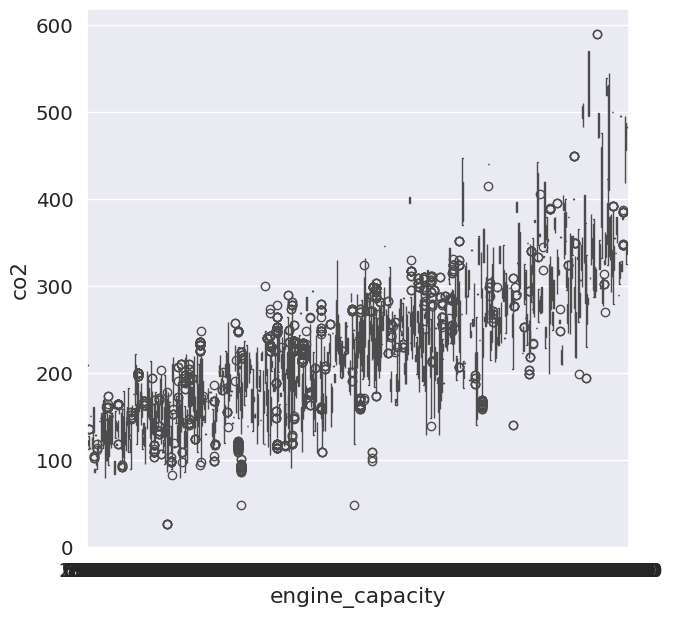

In [ ]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['co2'], df_train['engine_capacity']], axis=1)
sns.boxplot(x = df_train['engine_capacity'], y="co2", data = data)

<ipython-input-19-93fc3292d498>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['engine_capacity'])


Skewness: 2.164344
Kurtosis: 6.073711


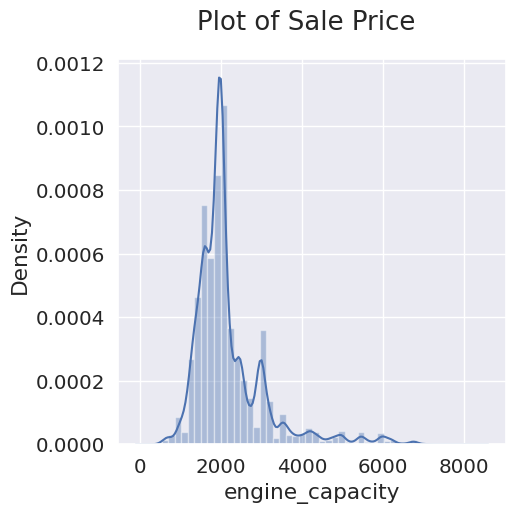

In [ ]:
sns.distplot(df_train['engine_capacity'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['engine_capacity'].skew())
print("Kurtosis: %f" % df_train['engine_capacity'].kurt())

In [ ]:
df_train["engine_capacity"].describe()

,engine_capacity
count,45504.000000
mean,2182.770526
std,899.100669
min,209.000000
25%,1598.000000
50%,1988.000000
75%,2429.000000
max,8285.000000


In [ ]:
#function to see the missing data in a dataframe
def missing_data(df,n):
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1,
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)

    print(missing_data.head(n))

In [ ]:
#training data
missing_data(df_train,20)

                       Total No of missing val  % of Missing val  \
standard_6_months                        42585         93.570785   
standard_12_months                       41994         92.272198   
date_of_change                           39297         86.346158   
tax_band                                 37674         82.779987   
fuel_cost_6000_miles                     33311         73.193294   
fuel_cost_12000_miles                    12375         27.191228   
transmission_type                          341          0.749269   
extra_urban_metric                          13          0.028565   
urban_metric                                13          0.028565   
transmission                                10          0.021973   
combined_metric                              7          0.015381   
engine_capacity                              7          0.015381   
manufacturer                                 0          0.000000   
fuel_type                                    0  

In [ ]:
# function to HANDLE the missing data in a dataframe
def missing (df):

    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["first_year_6_months"] = df["first_year_6_months"].fillna(df["first_year_6_months"].mean())
    df["standard_12_months"] = df["standard_12_months"].fillna(df["standard_12_months"].mean())
    df["thc_nox_emissions"] = df["thc_nox_emissions"].fillna(df["thc_nox_emissions"].mean())
    df["particulates_emissions"] = df["particulates_emissions"].fillna(df["particulates_emissions"].mean())
    df["thc_emissions"] = df["thc_emissions"].fillna(df["thc_emissions"].mean())
    df["fuel_cost_12000_miles"] = df["fuel_cost_12000_miles"].fillna(df["fuel_cost_12000_miles"].mean())
    df["fuel_cost_6000_miles"] = df["fuel_cost_6000_miles"].fillna(df["fuel_cost_6000_miles"].mean())
    df["nox_emissions"] = df["nox_emissions"].fillna(df["nox_emissions"].mean())
    df["co_emissions"] = df["co_emissions"].fillna(df["co_emissions"].mean())
    df["urban_imperial"] = df["urban_imperial"].fillna(df["urban_imperial"].mean())
    df["extra_urban_imperial"] = df["extra_urban_imperial"].fillna(df["extra_urban_imperial"].mean())
    df["extra_urban_metric"] = df["extra_urban_metric"].fillna(df["extra_urban_metric"].mean())
    df["urban_metric"] = df["urban_metric"].fillna(df["urban_metric"].mean())
    df["noise_level"] = df["noise_level"].fillna(df["noise_level"].mean())
    df["combined_metric"] = df["combined_metric"].fillna(df["combined_metric"].mean())
    df["combined_imperial"] = df["combined_imperial"].fillna(df["combined_imperial"].mean())
    df["date_of_change"] = df["date_of_change"].ffill().bfill()
    df["tax_band"] = df["tax_band"].ffill().bfill()
    df["transmission_type"] = df["transmission_type"].ffill()
    df["transmission"] = df["transmission"].ffill()

    # Llenar valores faltantes en columna numérica con la media
    df["engine_capacity"] = df["engine_capacity"].fillna(df["engine_capacity"].mean())

    # Llenar valores faltantes en 'standard_6_months' con la media
    df["standard_6_months"] = df["standard_6_months"].fillna(df["standard_6_months"].mean())

    return df


In [ ]:
missing(df=df_train)

KeyError: 'first_year_6_months'

In [ ]:
missing_data(df_train,20)

                       Total No of missing val  % of Missing val  \
standard_6_months                        42585         93.570785   
standard_12_months                       41994         92.272198   
date_of_change                           39297         86.346158   
tax_band                                 37674         82.779987   
fuel_cost_6000_miles                     33311         73.193294   
fuel_cost_12000_miles                    12375         27.191228   
transmission_type                          341          0.749269   
extra_urban_metric                          13          0.028565   
urban_metric                                13          0.028565   
transmission                                10          0.021973   
combined_metric                              7          0.015381   
engine_capacity                              7          0.015381   
manufacturer                                 0          0.000000   
fuel_type                                    0  

In [ ]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["engine_capacity"], axis=1)  # training features
y_train = train_set["engine_capacity"].copy()             # training label

X_valid = valid_set.drop(["engine_capacity"], axis=1)  # testing features
y_valid = valid_set["engine_capacity"].copy()               # testing label

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

X_train shape: (31857, 17)
y_train shape: (31857,)

X_valid shape: (13654, 17)
y_valid shape: (13654,)


In [ ]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

153242
0


In [ ]:
# Columns to drop from X_train and X_valid
columns_to_drop = ['file', 'manufacturer', 'model', 'description','tax_band','transmission','transmission_type','fuel_type','date_of_change']

# Drop columns from X_train
for col in columns_to_drop:
    if col in X_train.columns:
        X_train = X_train.drop(columns=[col], axis=1)

# Drop columns from X_valid
for col in columns_to_drop:
    if col in X_valid.columns:
        X_valid = X_valid.drop(columns=[col], axis=1)

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean

X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

# Fit the model after dropping the columns and imputing missing values
model = LinearRegression()
model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['standard_12_months' 'standard_6_months']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['standard_12_months' 'standard_6_months']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LinearRegression()

In [ ]:
# Columns to drop from X_train and X_valid
columns_to_drop = ['file', 'manufacturer', 'model', 'description','tax_band','transmission','transmission_type','fuel_type','date_of_change']

# Drop columns from X_train
for col in columns_to_drop:
    if col in X_train.columns:
        X_train = X_train.drop(columns=[col], axis=1)

# Drop columns from X_valid
for col in columns_to_drop:
    if col in X_valid.columns:
        X_valid = X_valid.drop(columns=[col], axis=1)

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean

X_train_imputed = imputer.fit_transform(X_train)
# Use the trained imputer to transform X_valid
X_valid_imputed = imputer.transform(X_valid) # Use the same imputer used for X_train

# Fit the model after dropping the columns and imputing missing values
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions using the imputed X_valid
y_pred = model.predict(X_valid_imputed) # Predict on the imputed data

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['standard_12_months' 'standard_6_months']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['standard_12_months' 'standard_6_months']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
y_pred

array([1810.10687219, 1979.85015352, 1997.32137676, ..., 1431.82105138,
       1567.91483693, 1583.1056848 ])

In [ ]:
# Check for NaN in y_valid and y_pred
print(f'NaN in y_valid: {y_valid.isnull().sum().sum()}')
print(f'NaN in y_pred: {np.isnan(y_pred).sum()}')

# If NaN values exist in y_valid or y_pred:
if y_valid.isnull().sum().sum() > 0 or np.isnan(y_pred).sum() > 0:
    # Handle them before calculating the mean squared error.
    # Options include:
    # 1. Removing rows with NaN values:
    y_valid = y_valid.dropna()

    # Ensure X_valid and y_pred have the same number of rows as y_valid
    X_valid = X_valid.loc[y_valid.index]
    y_pred = y_pred[y_valid.index] # Use y_valid.index to align y_pred with y_valid

    # 2. Imputing missing values:
    # from sklearn.impute import SimpleImputer
    # imputer = SimpleImputer(strategy='mean')
    # y_valid = imputer.fit_transform(y_valid.reshape(-1, 1))
    # y_pred = imputer.fit_transform(y_pred.reshape(-1, 1))

# Recalculate MSE and R2 after handling NaN values
mse = mean_squared_error(y_valid, y_pred) # This line was previously indented, causing it to only execute if NaN values existed
r2 = r2_score(y_valid, y_pred) # This line was previously indented, causing it to only execute if NaN values existed

print(f'Error cuadrático medio: {mse}')
print(f'R²: {r2}')

NaN in y_valid: 7
NaN in y_pred: 0


IndexError: index 31857 is out of bounds for axis 0 with size 13654

In [ ]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):

    fig = plt.figure(figsize=(15,15))
    fig, ax = plt.subplots()

    ax.scatter(y_train, y_pred,color = "red",edgecolor = 'blue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

ValueError: x and y must be the same size

<Figure size 1500x1500 with 0 Axes>

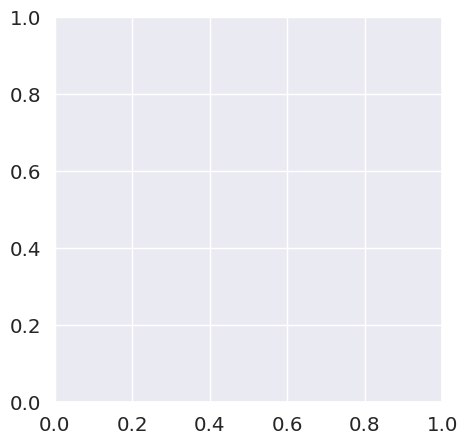

In [ ]:
actual_vs_pred_plot(y_valid,y_pred)

In [ ]:
# prompt: overfitting

from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# ... (Your existing code) ...

# Fit the model after dropping the columns and imputing missing values
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions using the imputed X_valid
y_pred = model.predict(X_valid_imputed)

# Evaluate the model on the training data
y_train_pred = model.predict(X_train_imputed)
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_pred)

print(f"R-squared on training data: {train_r2}")
print(f"R-squared on validation data: {valid_r2}")

# Check for overfitting
if train_r2 > valid_r2 and train_r2 > 0.95:
  print("Warning: The model may be overfitting.")
  # Consider techniques to reduce overfitting:
  # - Regularization (Lasso, Ridge)
  # - Feature selection
  # - Cross-validation
  # - Simpler model
